# Nonlinear AutoRegressive with eXogenous inputs

In [1]:
import numpy as np
import nolds
import scipy.io
import mne
import pandas as pd
import seaborn as sns
import pyqtgraph as pg
from scipy.io import loadmat
from scipy import stats
import matplotlib.pyplot as plt
import antropy as ent
from attractors import Attractor
from antropy import higuchi_fd
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from pyrqa.result import RQAResult
from pyrqa.opencl import OpenCL
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.image_generator import ImageGenerator
import numpy as np
import matplotlib.pyplot as plt
from antropy import higuchi_fd

In [2]:
# Load data
data = loadmat('/home/vincent/AAA_projects/MVCS/Neuroscience/downsampled/EEG_DS_Struct_0101.mat')

In [3]:
DSamp = data['DSamp']

triggers = DSamp[0][0][0]
EEGdata = DSamp[0][0][1]
fs = DSamp[0][0][2][0][0] 
fsOld = DSamp[0][0][3][0][0] 
time = DSamp[0][0][4][0]
label = DSamp[0][0][5]
nchan = DSamp[0][0][6][0][0]
rate = DSamp[0][0][7][0][0]
npt = DSamp[0][0][8][0][0]
Subj = DSamp[0][0][9][0]
ptrackerPerf = DSamp[0][0][10]
ptrackerTime = DSamp[0][0][11]
ptrackerfs = DSamp[0][0][12][0][0]

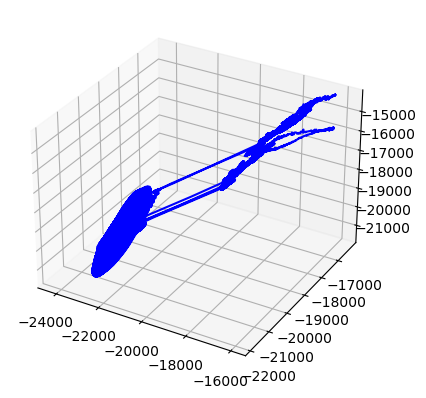

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load your EEG data here, replace this with actual loading
# Assume EEGdata is numpy array of shape (num_electrodes, time_steps)
# For example:
# EEGdata = np.random.randn(3, 20000)

num_electrodes, num_time_steps = EEGdata.shape

# Split data into training and testing
num_half = num_time_steps // 2
train_data = torch.Tensor(EEGdata[:, :num_half-1])
train_target = torch.Tensor(EEGdata[:, 1:num_half])
test_data = torch.Tensor(EEGdata[:, num_half:num_time_steps-1])

class NARX(nn.Module):
    def __init__(self, num_electrodes):
        super().__init__()
        self.fc1 = nn.Linear(num_electrodes, 8)
        self.fc2 = nn.Linear(8, num_electrodes)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

net = NARX(num_electrodes)

# Set up training
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    output = net(train_data.t())
    loss = criterion(output, train_target.t())
    loss.backward()
    optimizer.step()

# Testing
output = net(test_data.t()).t().detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(output[0, :], output[1, :], output[2, :], 'red')
ax.plot3D(EEGdata[0, num_half:], EEGdata[1, num_half:], EEGdata[2, num_half:], 'blue')

plt.show()